In [19]:
import sklearn
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt

# Review

1. Classes, objects, and encapulation, 
2. Cross validation (CV), and
3. Proper comparisons based on CV.

### Review - Classes

1. A `class` is a blue print for a `type` of object.
2. Use `class` statement to create in Python,
3. Naming convension $\longrightarrow$ start with a capital letter,
4. "Calling" the class makes an object using the constructor `__init__`, and
5. All methods start with `self` to access the current object.
   

In [20]:
class MyClass:
    def __init__(self, data):
        """ Constructor"""
        self.__data__ = data # a dunder attribute

    def get_data(self):
        """ Getter"""
        return self.__data__

    def set_data(self, data):
        """Setter"""
        self.__data__ = data

    def add_one(self):
        """Method that mutates data"""
        self.__data__ += 1

### Review - Objects

1. An instance of a `class`,
2. Created by "calling" the constructor,
3. Each object encapsulates its own data.

In [21]:
obj1 = MyClass(5)
obj1.get_data()

5

In [22]:
obj2 = MyClass(2)
obj2.get_data()

2

In [23]:
obj1.add_one()
obj1.get_data()

6

In [24]:
obj2.get_data()

2

### Using `sklearn` classes and objects

1. Import the class for desired ML model,
2. Create an object instance of the class,
3. Fit the object to training data.

In [25]:
from sklearn.tree import DecisionTreeClassifier

my_model = DecisionTreeClassifier(max_depth=5, class_weight="balanced")
my_model

DecisionTreeClassifier(class_weight='balanced', max_depth=5)

In [26]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets

In [28]:
my_model.fit(X, y)

DecisionTreeClassifier(class_weight='balanced', max_depth=5)

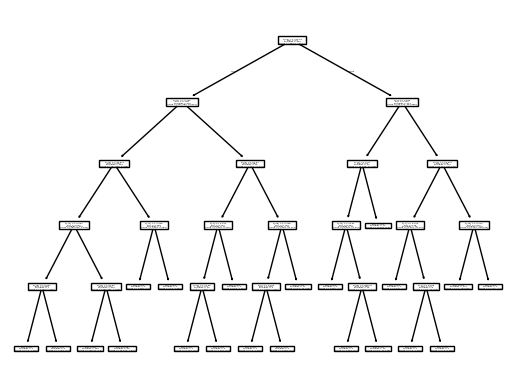

In [31]:
from sklearn.tree import plot_tree

_ = plot_tree(my_model)

## Cross Validation

Cross validation is a more robust method of measuring performance and comparing models, as it uses all the data to both train and test the model.  In this section, we will look at

1. How to compute a single performance metric using `cross_val_score`,
2. Compute multiple metrics over the same split using ``, and
3. Compare two or more models over the same CV split.

### What is cross validation?

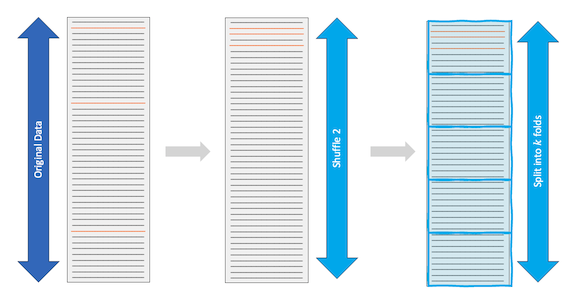

### Why use cross validation?

**Answer.** Cross validation uses all the data!

1. Each data value is sure to build $k-1$ models, and
2. Each data value help out once to test the model.

## Comparing two models cross validation

Next, we look at comparing two models' performance using cross-validation.

### The problem - Difference shuffles for different models

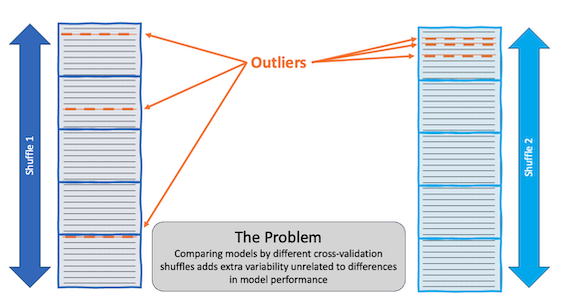

### The solution - Use the same shuffle to compare all models

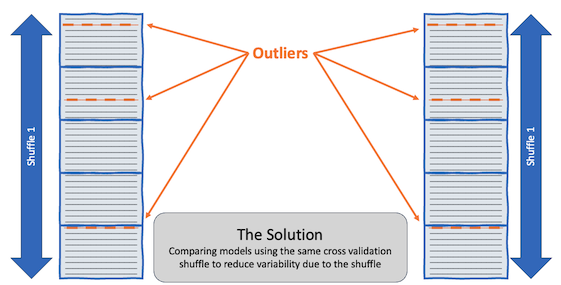


## <font color="red"> Exercise 2.6.0 </font>

1. Run the `help`/`?` on `RandomForestClassifier` and explore the various tuning parameters,
2. Create an two instances of the `RandomForestClassifier` from `sklearn.ensemble` with different user specified tuning parameters,
3. Verify that each object encapulates the correct model parameters, and
4. Fit each model object the the breast cancer data to both models.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
# Your code here (add cells as needed)